# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
cc_trades = ta.get_coincheck_trades_df()
lq_trades = ta.get_liquid_trades_df()

In [8]:
len(cc_trades), len(lq_trades)

(32, 32)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |               11927 |
+---------------------+---------------------+
|            取引回数 |                  32 |
+---------------------+---------------------+
|            開始日時 | 2020-03-25 10:52:19 |
+---------------------+---------------------+
|            終了日時 | 2020-03-25 14:02:26 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 03:10:07 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.006 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+----------+
| 開始[JPY]   |    11788 |
+-------------+----------+
| 終了[JPY]   |    11792 |
+-------------+----------+
| 利益[JPY]   |        4 |
+-------------+----------+
| 開始[BTC]   | 0.021122 |
+-------------+----------+
| 終了[B

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,cc_side,cc_price,lq_side,lq_price,profit
timestamp,,,,,
2020-03-25 10:55:20,sell,4427.844,buy,4429.626,-1.782
2020-03-25 10:58:05,buy,4400.993,sell,4398.432,-2.561
2020-03-25 10:59:26,sell,4405.896,buy,4406.682,-0.786
2020-03-25 11:01:36,buy,4413.998,sell,4413.888,-0.110
2020-03-25 11:07:55,sell,4412.286,buy,4411.812,0.474
2020-03-25 11:08:16,buy,4411.995,sell,4412.490,0.495
2020-03-25 11:20:25,sell,4432.086,buy,4430.730,1.356
2020-03-25 11:20:44,buy,4432.996,sell,4434.378,1.382
2020-03-25 11:36:16,sell,4399.974,buy,4399.164,0.810


In [12]:
round(sum(profit_df.profit), 3)

4.007

## トレードグラフ

In [13]:
cc_ticks = ta.get_coincheck_ticks_df()
lq_ticks = ta.get_liquid_ticks_df()

In [14]:
len(cc_ticks), len(lq_ticks)

(11927, 11927)

In [15]:
cc_bids = cc_ticks['bid']
cc_asks = cc_ticks['ask']
lq_bids = lq_ticks['bid']
lq_asks = lq_ticks['ask']

fig1, ax1 = ta.get_fig(cc_bids, lq_asks)
fig2, ax2 = ta.get_fig(lq_bids, cc_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

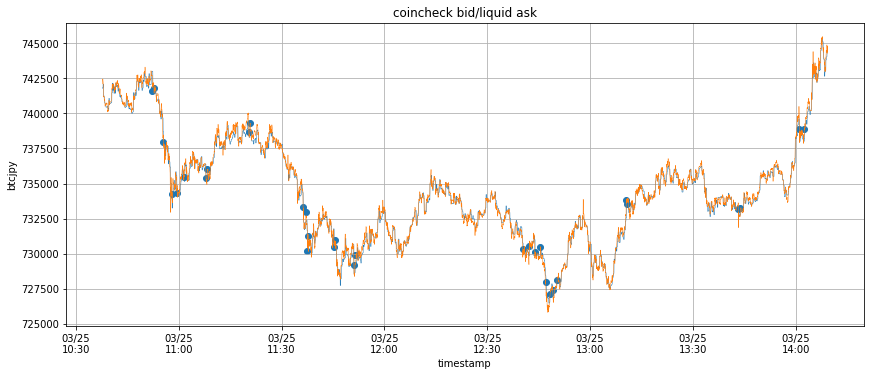

In [16]:
fig1

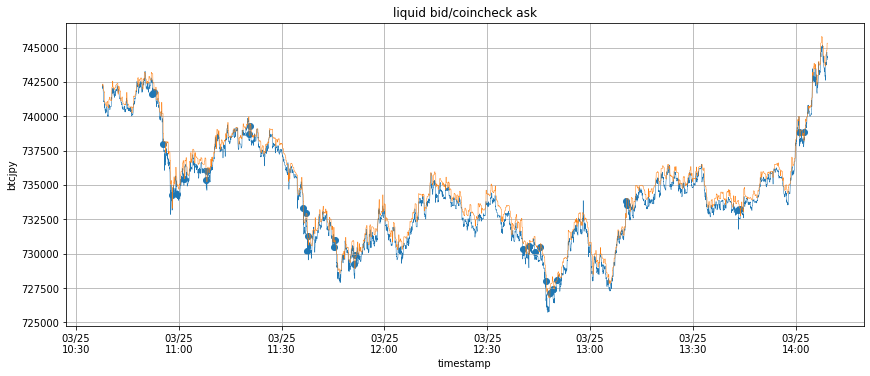

In [17]:
fig2